In [ ]:
import pandas as pd
import re
import nltk
import string
from nltk.corpus import stopwords
import spacy

from sklearn.metrics import accuracy_score,classification_report, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
nlp = spacy.load('en', disable=['parser', 'ner'])

In [ ]:
# DATA CLEANING AND PREPARATION #
class Utils(object):

    def cleanText(self, text):
        review = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", str(text))
        review = re.sub(r"\([\s\S]*\)", " ", str(review))
        review = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", str(review))
        review = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", str(review))
        review = review.lower()
        review = re.sub(r"that's", "that is", str(review))
        review = re.sub(r"there's", "there is", str(review))
        review = re.sub(r"what's", "what is", str(review))
        review = re.sub(r"where's", "where is", str(review))
        review = re.sub(r"it's", "it is", str(review))
        review = re.sub(r"who's", "who is", str(review))
        review = re.sub(r"i'm", "i am", str(review))
        review = re.sub(r"she's", "she is", str(review))
        review = re.sub(r"he's", "he is", str(review))
        review = re.sub(r"they're", "they are", str(review))
        review = re.sub(r"who're", "who are", str(review))
        review = re.sub(r"ain't", "am not", str(review))
        review = re.sub(r"wouldn't", "would not", str(review))
        review = re.sub(r"shouldn't", "should not", str(review))
        review = re.sub(r"can't", "can not", str(review))
        review = re.sub(r"couldn't", "could not", str(review))
        review = re.sub(r"won't", "will not", str(review))
        review = re.sub(r" pm ", " ", str(review))
        review = re.sub(r" am ", " ", str(review))
        review = re.sub(r'[^\[\]]+(?=\])', " ", str(review))
        review = re.sub(r"\W", " ", str(review))
        review = re.sub(r"\d", " ", str(review))
        review = re.sub(r"\s+[a-z]\s+", " ", str(review))
        review = re.sub(r"\s+[a-z]$", " ", str(review))
        review = re.sub(r"^[a-z]\s+", " ", str(review))
        review = re.sub(r"\s+", " ", str(review))
        return review

    def remove_punc(self, text):
        table = str.maketrans("", "", string.punctuation)
        return text.translate(table)

    def remove_emoticon(self, text):
        emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)


    
    def lemmatization(self, text):
        doc = nlp(text)
        return " ".join([token.lemma_ for token in doc])

    nltk.download('stopwords')
    def remove_stops(self, text):
        stop_words = set(nltk.corpus.stopwords.words('english'))
        text = [word.lower() for word in text.split() if word.lower() not in stop_words]
        return " ".join(text)


    def readData1(self, path, inputColumnIndex=0, outputColumnIndex=1):
        df = pd.read_csv(path, error_bad_lines=False, sep='\t')
        X = df.iloc[:, inputColumnIndex].values
        y = df.iloc[:, outputColumnIndex].values
        return X,y
    
    def readData2(self, path, inputColumnIndex=1, outputColumnIndex=2):
        df = pd.read_csv(path, error_bad_lines=False, sep='\t')
        X = df.iloc[:, inputColumnIndex].values
        y = df.iloc[:, outputColumnIndex].values
        return X,y
    
    def draw_prediction_results(self, y_pred, y_test, my_tags, method):
        print('accuracy of ' + method + ': %s' % accuracy_score(y_pred, y_test))
        print(classification_report(y_test, y_pred, target_names=my_tags, digits = 6))
    
    def create_csv(self, y_pred, y_test, classifier):
        report = classification_report(y_test, y_pred)
        lines = report.split('\n')
        line = lines[-2].split()
        line.remove('weighted')
        line[0] = classifier
        df = pd.DataFrame(line).transpose()
        csv_data = df.to_csv(index=False)
        df.to_csv('Malayalam.csv',  mode='a', header=False, index=False)
        
    
    def crossValidation(self, prediction, input, output, k=5):
        scores = cross_val_score(prediction, input,output, cv=k)
        print("Accuracy of Cross Validation Mean: %0.6f (+/- %0.6f)" % (scores.mean(), scores.std() * 2))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# FUNCTION CALL FOR DATA CLEANING AND PREPARATION #
utils = Utils()
X1,y_train=utils.readData1('Mal_sentiment_full_train.tsv')

ourTags =['not-malayalam', 'unknown_state', 'Positive', 'Mixed_feelings', 'Negative']
X_train=[]

for i in range(0, len(X1)):
    t = utils.cleanText(X1[i])
    t = utils.remove_emoticon(t)
    t = utils.remove_punc(t)
    t = utils.remove_stops(t)
    t = utils.lemmatization(t)
    X_train.append(t)

print(X_train[:10])
#X_train, X_test, y_train, y_test = train_test_split(corpus, y, test_size=0.3, random_state=0)

['sunny chechi fan evide like adichu power kaniku', 'angane july month ile ende aadyathe leave njan angu edukuva july nu', 'ഏട ടന റ പ ത യ പടത ത ന വ ണ ട ക ത ത ര ക ക ന നവർ ല ക ബട ടൺ അട ച ച പ ള ക ക', 'ഇന ല ല ട ടന റ വ ട ട ത ടങ ങ ൻ പ ക ന ന മ ൻ ക ല collection recordukal ഭ ത ച ച ര ക ക', 'trailer powli oru raksha illa pakshea padam irangattea veruthea degrade venda padam irangittu paraya', 'malayalam padam thanne aanu vere level', 'history mammukka kattawaiting support love mammukka', 'yaaru andha mech le penne', 'ആമയ വ ള ളത ത ൽ മ ക ക ക ല ല ന ന ഇനമ', 'ജ ഷ രണ ട കല പ ച ച ആണ ല ല സ ഭവ എന ത യ ല പ ള ക ക']


(array(['Mixed_feelings', 'Negative', 'Positive', 'not-malayalam',
       'unknown_state'], dtype=object), array([ 926, 2105, 6421, 1157, 5279]))
15888


Text(0.5, 1.0, 'Malayalam')

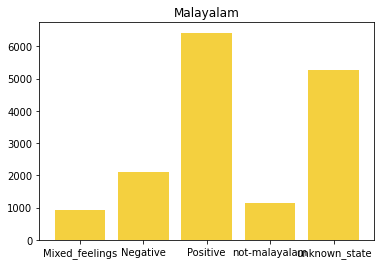

In [ ]:
# BAR PLOT VISUALIZATION
import numpy as np 
import matplotlib.pyplot as plt

data_spread = np.unique(y_train, return_counts=True)
print(np.unique(y_train, return_counts=True))
print(len(X_train))

x_labels = data_spread[0]
y_labels = data_spread[1]
plt.bar(x_labels, y_labels, color=['#F4D03F'])
plt.title('Malayalam')

In [ ]:
# FUNCTION CALL FOR DATA CLEANING AND PREPARATION #
utils = Utils()
X2,y_test=utils.readData2('Mal_sentiment_full_test_withlabels.tsv')

X_test=[]

for i in range(0, len(X2)):
    t = utils.cleanText(X2[i])
    t = utils.remove_emoticon(t)
    t = utils.remove_punc(t)
    t = utils.remove_stops(t)
    t = utils.lemmatization(t)
    X_test.append(t)
#print(corpus)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
line = ['', 'precision', 'recall', 'f1-score',  'support']
df = pd.DataFrame(line).transpose()
csv_data = df.to_csv(index=False)
df.to_csv('Malayalam.csv',  mode='a', header=False, index=False)

In [ ]:
# LOGISTIC REGRESSION #
lrp = Pipeline([('vect', CountVectorizer(min_df=3, max_df=0.2,analyzer='word', ngram_range=(1, 3))),
                ('tfidf', TfidfTransformer()),
                ('lr', LogisticRegression(max_iter=1000))
                ])
lrp.fit(X_train, y_train)
y_pred = lrp.predict(X_test)

# prediction results
#utils.draw_prediction_results(y_pred,y_test,ourTags,"Logistic Regression")

utils.create_csv(y_pred, y_test, 'LR')

#prediction results
utils.draw_prediction_results(y_pred,y_test,ourTags,"Logistic Regression")

accuracy of Logistic Regression: 0.6605504587155964
                precision    recall  f1-score   support

 not-malayalam   0.647059  0.164179  0.261905       134
 unknown_state   0.655844  0.391473  0.490291       258
      Positive   0.656566  0.833333  0.734463       780
Mixed_feelings   0.717172  0.482993  0.577236       147
      Negative   0.659854  0.702955  0.680723       643

      accuracy                       0.660550      1962
     macro avg   0.667299  0.514987  0.548924      1962
  weighted avg   0.661440  0.660550  0.640688      1962



In [ ]:
# MULTINOMIAL NAIVE BAYES #
multinomial_naive_bayes = Pipeline([('vect', CountVectorizer(min_df=3, max_df=0.2, analyzer='word', ngram_range=(1, 3),)),
                        ('tfidf', TfidfTransformer()),
                        ('multinomial_naive_bayes',
                         MultinomialNB())
                        ])
multinomial_naive_bayes.fit(X_train, y_train)
y_pred = multinomial_naive_bayes.predict(X_test)

utils.create_csv(y_pred, y_test, 'MNB')

# prediction results
utils.draw_prediction_results(y_pred,y_test,ourTags,"Multinomial Naive Bayes")

accuracy of Multinomial Naive Bayes: 0.5958205912334352
                precision    recall  f1-score   support

 not-malayalam   0.666667  0.014925  0.029197       134
 unknown_state   0.731343  0.189922  0.301538       258
      Positive   0.559738  0.876923  0.683317       780
Mixed_feelings   0.862745  0.299320  0.444444       147
      Negative   0.630048  0.606532  0.618067       643

      accuracy                       0.595821      1962
     macro avg   0.690108  0.397525  0.415313      1962
  weighted avg   0.635352  0.595821  0.549157      1962



In [ ]:
# LINEAR SVM #
linear_svm = Pipeline([('vect', CountVectorizer(min_df=3, max_df=0.2, analyzer='word', ngram_range=(1, 3),)),
                        ('tfidf', TfidfTransformer()),
                        ('linear_svc',
                        SVC(kernel='linear'))
                        ])
linear_svm.fit(X_train, y_train)
y_pred = linear_svm.predict(X_test)

utils.create_csv(y_pred, y_test, 'L-SVM')

# prediction results
utils.draw_prediction_results(y_pred,y_test,ourTags,"Linear SVM")

accuracy of Linear SVM: 0.6610601427115188
                precision    recall  f1-score   support

 not-malayalam   0.620000  0.231343  0.336957       134
 unknown_state   0.626437  0.422481  0.504630       258
      Positive   0.666310  0.798718  0.726531       780
Mixed_feelings   0.673913  0.632653  0.652632       147
      Negative   0.663158  0.685848  0.674312       643

      accuracy                       0.661060      1962
     macro avg   0.649964  0.554209  0.579012      1962
  weighted avg   0.657441  0.661060  0.648094      1962



In [ ]:
# RBF SVM #
rbf_svm = Pipeline([('vect', CountVectorizer(min_df=3, max_df=0.2, analyzer='word', ngram_range=(1, 3),)),
                        ('tfidf', TfidfTransformer()),
                        ('rbf_svc',
                        SVC(kernel='rbf', gamma=1))
                        ])
rbf_svm.fit(X_train, y_train)
y_pred = rbf_svm.predict(X_test)

utils.create_csv(y_pred, y_test, 'R-SVM')

# prediction results
utils.draw_prediction_results(y_pred,y_test,ourTags,"RBF SVM")

accuracy of RBF SVM: 0.6580020387359837
                precision    recall  f1-score   support

 not-malayalam   0.806452  0.186567  0.303030       134
 unknown_state   0.703125  0.348837  0.466321       258
      Positive   0.637795  0.830769  0.721604       780
Mixed_feelings   0.754717  0.544218  0.632411       147
      Negative   0.657856  0.696734  0.676737       643

      accuracy                       0.658002      1962
     macro avg   0.711989  0.521425  0.560021      1962
  weighted avg   0.673240  0.658002  0.638060      1962



In [ ]:
# POLY SVM #
poly_svm = Pipeline([('vect', CountVectorizer(min_df=3, max_df=0.2, analyzer='word', ngram_range=(1, 3),)),
                        ('tfidf', TfidfTransformer()),
                        ('poly_svc',
                        SVC(kernel='poly',degree = 1))
                        ])
poly_svm.fit(X_train, y_train)
y_pred = poly_svm.predict(X_test)

utils.create_csv(y_pred, y_test, 'P-SVM')

# prediction results
utils.draw_prediction_results(y_pred,y_test,ourTags,"POLY SVM")

accuracy of POLY SVM: 0.6620795107033639
                precision    recall  f1-score   support

 not-malayalam   0.620000  0.231343  0.336957       134
 unknown_state   0.630058  0.422481  0.505800       258
      Positive   0.667024  0.798718  0.726954       780
Mixed_feelings   0.673913  0.632653  0.652632       147
      Negative   0.664168  0.688958  0.676336       643

      accuracy                       0.662080      1962
     macro avg   0.651032  0.554831  0.579736      1962
  weighted avg   0.658531  0.662080  0.649080      1962



In [ ]:
# RANDOM FOREST #
random_forest = Pipeline([('vect', CountVectorizer(min_df=3, max_df=0.2, analyzer='word', ngram_range=(1, 3),)),
                        ('tfidf', TfidfTransformer()),
                        ('random_forest',
                         RandomForestClassifier())
                        ])
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

utils.create_csv(y_pred, y_test, 'RF')

# prediction results
utils.draw_prediction_results(y_pred,y_test,ourTags,"Random Forest")

accuracy of Random Forest: 0.6304791029561672
                precision    recall  f1-score   support

 not-malayalam   0.567568  0.156716  0.245614       134
 unknown_state   0.623853  0.263566  0.370572       258
      Positive   0.635611  0.787179  0.703322       780
Mixed_feelings   0.600000  0.591837  0.595890       147
      Negative   0.634043  0.695179  0.663205       643

      accuracy                       0.630479      1962
     macro avg   0.612215  0.498895  0.515721      1962
  weighted avg   0.626235  0.630479  0.607109      1962



In [ ]:
# KNeighborsClassifier #
knn = Pipeline([('vect', CountVectorizer(min_df=3, max_df=0.2, analyzer='word', ngram_range=(1, 3),)),
                        ('tfidf', TfidfTransformer()),
                        ('kNN', KNeighborsClassifier(n_neighbors=3))
                        ])
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

utils.create_csv(y_pred, y_test, 'kNN')

# prediction results
utils.draw_prediction_results(y_pred,y_test,ourTags,"KNeighborsClassifier")

accuracy of KNeighborsClassifier: 0.45871559633027525
                precision    recall  f1-score   support

 not-malayalam   0.460317  0.216418  0.294416       134
 unknown_state   0.417476  0.166667  0.238227       258
      Positive   0.634328  0.326923  0.431472       780
Mixed_feelings   0.597701  0.353741  0.444444       147
      Negative   0.398623  0.810264  0.534359       643

      accuracy                       0.458716      1962
     macro avg   0.501689  0.374803  0.388584      1962
  weighted avg   0.513937  0.458716  0.431391      1962



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

In [ ]:
# EXTRA TREE CLASSIFIER #
extra_tree = Pipeline([('vect', CountVectorizer(min_df=3, max_df=0.2, analyzer='word', ngram_range=(1, 3),)),
                        ('tfidf', TfidfTransformer()),
                        ('extra tree',
                         ExtraTreesClassifier())
                        ])
extra_tree.fit(X_train, y_train)
y_pred = extra_tree.predict(X_test)

utils.create_csv(y_pred, y_test, 'XTree')

# prediction results
utils.draw_prediction_results(y_pred,y_test,ourTags,"Extra Tree Classifier")

accuracy of Extra Tree Classifier: 0.6467889908256881
                precision    recall  f1-score   support

 not-malayalam   0.600000  0.223881  0.326087       134
 unknown_state   0.610687  0.310078  0.411311       258
      Positive   0.656748  0.792308  0.718187       780
Mixed_feelings   0.584906  0.632653  0.607843       147
      Negative   0.657856  0.696734  0.676737       643

      accuracy                       0.646789      1962
     macro avg   0.622039  0.531131  0.548033      1962
  weighted avg   0.641796  0.646789  0.629202      1962



In [ ]:
# VOTING CLASSIFIER #
# ALL CLASSIFIERS #

#create a dictionary of our models
estimators=[("Linear SVM", linear_svm), ("Logistic Regression", lrp), ("Multinomial Naive Bayes", multinomial_naive_bayes), ("Extra Tree", extra_tree), ("Random Forest", random_forest), ("Poly SVM", poly_svm), ("RBF SVM", rbf_svm), ("KNeighborsClassifier", knn)]

hard_ensemble = VotingClassifier(estimators, voting="hard")
hard_ensemble.fit(X_train, y_train)
y_pred = hard_ensemble.predict(X_test)

utils.create_csv(y_pred, y_test, 'HEns')

# prediction results
utils.draw_prediction_results(y_pred,y_test,ourTags,"Hard Ensemble")

accuracy of Hard Ensemble: 0.6625891946992865
                precision    recall  f1-score   support

 not-malayalam   0.717949  0.208955  0.323699       134
 unknown_state   0.676056  0.372093  0.480000       258
      Positive   0.648649  0.830769  0.728499       780
Mixed_feelings   0.726496  0.578231  0.643939       147
      Negative   0.666165  0.688958  0.677370       643

      accuracy                       0.662589      1962
     macro avg   0.687063  0.535801  0.570702      1962
  weighted avg   0.668559  0.662589  0.645083      1962



In [ ]:
# VOTING CLASSIFIER #
# TOP 5 CLASSIFIERS #

#create a dictionary of our models
estimators=[("Linear SVM", linear_svm), ("Logistic Regression", lrp),  ("Random Forest", random_forest), ("Poly SVM", poly_svm), ("RBF SVM", rbf_svm)]

hard_ensemble = VotingClassifier(estimators, voting="hard")
hard_ensemble.fit(X_train, y_train)
y_pred = hard_ensemble.predict(X_test)

utils.create_csv(y_pred, y_test, 'HEns5')

# prediction results
utils.draw_prediction_results(y_pred,y_test,ourTags,"Hard Ensemble")

accuracy of Hard Ensemble: 0.6636085626911316
                precision    recall  f1-score   support

 not-malayalam   0.674419  0.216418  0.327684       134
 unknown_state   0.643750  0.399225  0.492823       258
      Positive   0.661491  0.819231  0.731959       780
Mixed_feelings   0.692308  0.612245  0.649819       147
      Negative   0.665158  0.685848  0.675345       643

      accuracy                       0.663609      1962
     macro avg   0.667425  0.546593  0.575526      1962
  weighted avg   0.663552  0.663609  0.648194      1962



In [ ]:
# VOTING CLASSIFIER #
# TOP 3 CLASSIFIERS #

#create a dictionary of our models
estimators=[("Linear SVM", linear_svm), ("Logistic Regression", lrp), ("Poly SVM", poly_svm)]

hard_ensemble = VotingClassifier(estimators, voting="hard")
hard_ensemble.fit(X_train, y_train)
y_pred = hard_ensemble.predict(X_test)

utils.create_csv(y_pred, y_test, 'HEns3')

# prediction results
utils.draw_prediction_results(y_pred,y_test,ourTags,"Hard Ensemble")

accuracy of Hard Ensemble: 0.6610601427115188
                precision    recall  f1-score   support

 not-malayalam   0.620000  0.231343  0.336957       134
 unknown_state   0.626437  0.422481  0.504630       258
      Positive   0.666310  0.798718  0.726531       780
Mixed_feelings   0.673913  0.632653  0.652632       147
      Negative   0.663158  0.685848  0.674312       643

      accuracy                       0.661060      1962
     macro avg   0.649964  0.554209  0.579012      1962
  weighted avg   0.657441  0.661060  0.648094      1962



In [ ]:
# VOTING CLASSIFIER #
# BEST OF ALL CLASSIFIERS #

#create a dictionary of our models
estimators=[("Linear SVM", linear_svm), ("Logistic Regression", lrp), ("Multinomial Naive Bayes", multinomial_naive_bayes), ("Extra Tree", extra_tree)]

hard_ensemble = VotingClassifier(estimators, voting="hard")
hard_ensemble.fit(X_train, y_train)
y_pred = hard_ensemble.predict(X_test)

utils.create_csv(y_pred, y_test, 'HEnsA')

# prediction results
utils.draw_prediction_results(y_pred,y_test,ourTags,"Hard Ensemble")

accuracy of Hard Ensemble: 0.6636085626911316
                precision    recall  f1-score   support

 not-malayalam   0.638889  0.171642  0.270588       134
 unknown_state   0.668790  0.406977  0.506024       258
      Positive   0.644315  0.850000  0.733002       780
Mixed_feelings   0.733945  0.544218  0.625000       147
      Negative   0.683043  0.670295  0.676609       643

      accuracy                       0.663609      1962
     macro avg   0.673796  0.528626  0.562245      1962
  weighted avg   0.666570  0.663609  0.644999      1962



In [ ]:
# ADABOOST #
#seed = 10
num_trees = 25

ada_boost = Pipeline([('vect', CountVectorizer(min_df=3, max_df=0.2, analyzer='word', ngram_range=(1, 3),)),
                        ('tfidf', TfidfTransformer()),
                        ('ada_boost',
                         AdaBoostClassifier(n_estimators=num_trees))
                        ])
ada_boost.fit(X_train, y_train)
y_pred = ada_boost.predict(X_test)

utils.create_csv(y_pred, y_test, 'AdaB')

# prediction results
utils.draw_prediction_results(y_pred,y_test,ourTags,"Ada Boost")

accuracy of Ada Boost: 0.4694189602446483
                precision    recall  f1-score   support

 not-malayalam   0.391304  0.067164  0.114650       134
 unknown_state   0.657143  0.089147  0.156997       258
      Positive   0.452364  0.821795  0.583523       780
Mixed_feelings   0.450704  0.217687  0.293578       147
      Negative   0.519231  0.335925  0.407932       643

      accuracy                       0.469419      1962
     macro avg   0.494149  0.306344  0.311336      1962
  weighted avg   0.496912  0.469419  0.416143      1962



In [ ]:
# XGBOOST #
xg_boost = Pipeline([('vect', CountVectorizer(min_df=3, max_df=0.2, analyzer='word', ngram_range=(1, 3),)),
                        ('tfidf', TfidfTransformer()),
                        ('xgboost',
                         XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1,
 seed=27))
])
xg_boost.fit(X_train, y_train)
y_pred = xg_boost.predict(X_test)

utils.create_csv(y_pred, y_test, 'XGB')

# prediction results
utils.draw_prediction_results(y_pred,y_test,ourTags,"XGBoost")

accuracy of XGBoost: 0.6320081549439348
                precision    recall  f1-score   support

 not-malayalam   0.583333  0.261194  0.360825       134
 unknown_state   0.550633  0.337209  0.418269       258
      Positive   0.653631  0.750000  0.698507       780
Mixed_feelings   0.643411  0.564626  0.601449       147
      Negative   0.625000  0.699844  0.660308       643

      accuracy                       0.632008      1962
     macro avg   0.611202  0.522575  0.547872      1962
  weighted avg   0.625137  0.632008  0.618803      1962

